<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/All_Regression_models_Housing_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/House_Rent_Dataset.csv')
pd.set_option('display.max_columns', None)
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data.drop(['Posted On'], axis = 1, inplace = True)
data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
dtypes: int64(4), object(7)
memory usage: 408.0+ KB


In [6]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
# Handling categorical columns
# label encoding and one hot encoding

# label encoding for Floor because there are too may unique values

data['Floor'].unique()
from sklearn.preprocessing import LabelEncoder
floor_le = LabelEncoder()
data['Floor'] = floor_le.fit_transform(data['Floor'])
data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,455,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,14,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,14,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,10,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,10,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [8]:
data['Area Type'].unique()
from sklearn.preprocessing import OneHotEncoder
area_type_encoder = OneHotEncoder()
area_type_encoded_df = pd.DataFrame(area_type_encoder.fit_transform(data[['Area Type']]).toarray())
area_type_encoded_df.columns = ['area_type_0', 'area_type_1', 'area_type_2']

data = data.join(area_type_encoded_df)
data.drop(['Area Type'], axis = 1, inplace = True)

data.head()


,BHK,Rent,Size,Floor,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,area_type_0,area_type_1,area_type_2
0,2,10000,1100,455,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.0,0.0,1.0
1,2,20000,800,14,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0
2,2,17000,1000,14,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0
3,2,10000,800,10,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0
4,2,7500,850,10,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0.0,1.0,0.0


In [9]:
# Again label encoding because of the huge number of unique values

len(data['Area Locality'].unique())
area_locality_le = LabelEncoder()
data['Area Locality'] = area_locality_le.fit_transform(data['Area Locality'])
data.head()

,BHK,Rent,Size,Floor,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,area_type_0,area_type_1,area_type_2
0,2,10000,1100,455,221,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.0,0.0,1.0
1,2,20000,800,14,1527,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0
2,2,17000,1000,14,1760,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0
3,2,10000,800,10,526,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0
4,2,7500,850,10,1890,Kolkata,Unfurnished,Bachelors,1,Contact Owner,0.0,1.0,0.0


In [10]:
data['City'].unique()
city_encoder = OneHotEncoder()
city_encoded_df = pd.DataFrame(city_encoder.fit_transform(data[['City']]).toarray())
city_encoded_df.columns = ['city_'+str(i) for i in range(0,6)]
data = data.join(city_encoded_df)

data.drop(['City'], axis = 1, inplace = True)
data.head()

,BHK,Rent,Size,Floor,Area Locality,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,area_type_0,area_type_1,area_type_2,city_0,city_1,city_2,city_3,city_4,city_5
0,2,10000,1100,455,221,Unfurnished,Bachelors/Family,2,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,14,1527,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,14,1760,Semi-Furnished,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,10,526,Unfurnished,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,10,1890,Unfurnished,Bachelors,1,Contact Owner,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
data['Furnishing Status'].unique()
furnishing_status_encoder = OneHotEncoder()
furnishing_status_encoded_df = pd.DataFrame(furnishing_status_encoder.fit_transform(data[['Furnishing Status']]).toarray())
furnishing_status_encoded_df.columns = ['furnish_status_'+str(i) for i in range(0,3)]

data = data.join(furnishing_status_encoded_df)
data.drop(['Furnishing Status'], axis = 1, inplace = True)

data.head()

,BHK,Rent,Size,Floor,Area Locality,Tenant Preferred,Bathroom,Point of Contact,area_type_0,area_type_1,area_type_2,city_0,city_1,city_2,city_3,city_4,city_5,furnish_status_0,furnish_status_1,furnish_status_2
0,2,10000,1100,455,221,Bachelors/Family,2,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,20000,800,14,1527,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,17000,1000,14,1760,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2,10000,800,10,526,Bachelors/Family,1,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,7500,850,10,1890,Bachelors,1,Contact Owner,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
data['Tenant Preferred'].unique()
tenant_preferred_encoder = OneHotEncoder()
tenant_preferred_encoded_df = pd.DataFrame(tenant_preferred_encoder.fit_transform(data[['Tenant Preferred']]).toarray())
tenant_preferred_encoded_df.columns = ['tenant_preferred'+str(i) for i in range(0,3)]

data = data.join(tenant_preferred_encoded_df)
data.drop(['Tenant Preferred'], axis = 1, inplace = True)

data.head()

,BHK,Rent,Size,Floor,Area Locality,Bathroom,Point of Contact,area_type_0,area_type_1,area_type_2,city_0,city_1,city_2,city_3,city_4,city_5,furnish_status_0,furnish_status_1,furnish_status_2,tenant_preferred0,tenant_preferred1,tenant_preferred2
0,2,10000,1100,455,221,2,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,20000,800,14,1527,1,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,17000,1000,14,1760,1,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2,10000,800,10,526,1,Contact Owner,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2,7500,850,10,1890,1,Contact Owner,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [13]:
data['Point of Contact'].unique()
poc_encoder = OneHotEncoder()
poc_encoded_df = pd.DataFrame(poc_encoder.fit_transform(data[['Point of Contact']]).toarray())
poc_encoded_df.columns = ['poc_'+str(i) for i in range(0,3)]

data = data.join(poc_encoded_df)
data.drop(['Point of Contact'], axis = 1, inplace = True)

data.head()

,BHK,Rent,Size,Floor,Area Locality,Bathroom,area_type_0,area_type_1,area_type_2,city_0,city_1,city_2,city_3,city_4,city_5,furnish_status_0,furnish_status_1,furnish_status_2,tenant_preferred0,tenant_preferred1,tenant_preferred2,poc_0,poc_1,poc_2
0,2,10000,1100,455,221,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,20000,800,14,1527,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,17000,1000,14,1760,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2,10000,800,10,526,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2,7500,850,10,1890,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# Handling numeric columns
# Scaling of all numeric columns except the target column
# included the label encoded column, not the one hot encoded ones

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_be_scaled = ['BHK', 'Size', 'Floor', 'Area Locality']
data[columns_to_be_scaled] = scaler.fit_transform(data[columns_to_be_scaled])

data.head()

,BHK,Rent,Size,Floor,Area Locality,Bathroom,area_type_0,area_type_1,area_type_2,city_0,city_1,city_2,city_3,city_4,city_5,furnish_status_0,furnish_status_1,furnish_status_2,tenant_preferred0,tenant_preferred1,tenant_preferred2,poc_0,poc_1,poc_2
0,-0.100773,10000,0.208960,1.384550,-1.375251,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.100773,20000,-0.264125,-1.324614,0.687519,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.100773,17000,0.051265,-1.324614,1.055532,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.100773,10000,-0.264125,-1.349187,-0.893517,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.100773,7500,-0.185277,-1.349187,1.260862,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
len(data.columns)

24

In [16]:
features_df = data.drop(['Rent'], axis = 1)
target_df = data['Rent']

In [17]:
features_df.head()
target_df.head()

feature_columns = list(features_df.columns)
len(features_df.columns)

23

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.2)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3796, 23)
(950, 23)
(3796,)
(950,)


In [20]:
# Linear Regression

# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train, y_train)

# y_train_pred = lr.predict(X_train)
# y_test_pred = lr.predict(X_test)

# import sklearn.metrics as metrics
# mae = metrics.mean_absolute_error(y_test, y_test_pred)
# mse = metrics.mean_squared_error(y_test, y_test_pred)
# rmse = metrics.mean_squared_error(y_test, y_test_pred, squared = False)
# r2 = metrics.r2_score(y_test, y_test_pred)
# adjusted_r2 = 1-(((1-r2)*(4746-1))/(4746-23-1))

# print('mae', mae)
# print('mse', mse)
# print('rmse', rmse)
# print('r2', r2)
# print('adjusted_r2', adjusted_r2)

# print('The co-efficients are: ' +str(list(zip(feature_columns, lr.coef_))))
# print('The y intercept is: ' +str(lr.intercept_))

# Results

# mae 21680.57157894737
# mse 1243023956.8094738
# rmse 35256.544879064284
# r2 0.5643635650992997
# adjusted_r2 0.5622416595502281
# The co-efficients are: [('BHK', 1523.6277050089004), ('Size', 27331.063258850685), ('Floor', 442.40715149967605), ('Area Locality', -438.2618769668555), ('Bathroom', 9726.719722048645), ('area_type_0', 7120346053861908.0), ('area_type_1', 7120346053855504.0), ('area_type_2', 7120346053851624.0), ('city_0', -1.959708776216449e+16), ('city_1', -1.959708776217173e+16), ('city_2', -1.9597087762155776e+16), ('city_3', -1.9597087762181124e+16), ('city_4', -1.959708776216737e+16), ('city_5', -1.9597087762114764e+16), ('furnish_status_0', -8.719725629988224e+16), ('furnish_status_1', -8.719725629988968e+16), ('furnish_status_2', -8.719725629988922e+16), ('tenant_preferred0', 5.252790651196763e+16), ('tenant_preferred1', 5.252790651196746e+16), ('tenant_preferred2', 5.252790651195817e+16), ('poc_0', -4.035301525351491e+17), ('poc_1', -4.035301525351231e+17), ('poc_2', -4.0353015253515846e+17)]
# The y intercept is: 4.50676244031398e+17

In [21]:
# Decision Tree Regression

# from sklearn.tree import DecisionTreeRegressor
# dt = DecisionTreeRegressor()
# dt.fit(X_train, y_train)

# y_train_pred = dt.predict(X_train)
# y_test_pred = dt.predict(X_test)

# import sklearn.metrics as metrics
# mae = metrics.mean_absolute_error(y_test, y_test_pred)
# mse = metrics.mean_squared_error(y_test, y_test_pred)
# rmse = metrics.mean_squared_error(y_test, y_test_pred, squared = False)
# r2 = metrics.r2_score(y_test, y_test_pred)
# adjusted_r2 = 1-(((1-r2)*(4746-1))/(4746-23-1))

# print('mae', mae)
# print('mse', mse)
# print('rmse', rmse)
# print('r2', r2)
# print('adjusted_r2', adjusted_r2)

# Results

# mae 15469.863157894737
# mse 2151104562.8042107
# rmse 46380.0017551122
# r2 0.20001081537272303
# adjusted_r2 0.19611421409224283

In [22]:
# Hyper Parameter tuning for Decision Tree Regression

# from sklearn.tree import DecisionTreeRegressor
# dt = DecisionTreeRegressor()

# from sklearn.model_selection import GridSearchCV
# params = {
#            'criterion': ['mae','mse','poisson'],
#             # 'max_depth': [5,10,15],
#             # 'min_samples_split': [2,5],
#             # 'min_samples_leaf': [2,5],
#             'max_features': ['sqrt','log2',None]
# }

# cv = GridSearchCV(dt, cv = 10, param_grid = params, n_jobs = 3)
# cv.fit(X_train, y_train)

# print('The best params are:', cv.best_params_)

In [23]:
# Hyper Parameter tuning for Decision Tree Regression

# dt.set_params(criterion = 'mae', max_features = None)
# dt.fit(X_train, y_train)
# y_train_pred = dt.predict(X_train)
# y_test_pred = dt.predict(X_test)

# import sklearn.metrics as metrics
# mae = metrics.mean_absolute_error(y_test, y_test_pred)
# mse = metrics.mean_squared_error(y_test, y_test_pred)
# rmse = metrics.mean_squared_error(y_test, y_test_pred, squared = False)
# r2 = metrics.r2_score(y_test, y_test_pred)
# adjusted_r2 = 1-(((1-r2)*(4746-1))/(4746-23-1))

# print('mae', mae)
# print('mse', mse)
# print('rmse', rmse)
# print('r2', r2)
# print('adjusted_r2', adjusted_r2)

# Results

# mae 14132.681052631578
# mse 1363401894.2094736
# rmse 36924.27242627095
# r2 0.5285677994407745
# adjusted_r2 0.5262715392516888

In [24]:
# Random Forest Regression

# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)

# y_train_pred = rf.predict(X_train)
# y_test_pred = rf.predict(X_test)

# import sklearn.metrics as metrics
# mae = metrics.mean_absolute_error(y_test, y_test_pred)
# mse = metrics.mean_squared_error(y_test, y_test_pred)
# rmse = metrics.mean_squared_error(y_test, y_test_pred, squared = False)
# r2 = metrics.r2_score(y_test, y_test_pred)
# adjusted_r2 = 1-(((1-r2)*(4746-1))/(4746-23-1))

# print('mae', mae)
# print('mse', mse)
# print('rmse', rmse)
# print('r2', r2)
# print('adjusted_r2', adjusted_r2)

# Results

# mae 11921.393934518115
# mse 1120710208.6387024
# rmse 33477.010150828915
# r2 0.6597760231477274
# adjusted_r2 0.6581188542642877

In [25]:
# Hyper parameter tuning for Random Forest Regression

# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor()
# from sklearn.model_selection import GridSearchCV
# params = {
#            'n_estimators': [15,30,45],
#            'criterion': ['mae','mse','poisson'],
#           #  'max_depth': [5,10,15],
#           #  'min_samples_split': [2,5],
#           #  'min_samples_leaf': [2,5],
#            'max_features': ['sqrt','log2',None]
#           }
# cv = GridSearchCV(rf, cv = 10, param_grid = params, n_jobs = 3)
# cv.fit(X_train, y_train)
# print('The best params are', cv.best_params_)

In [26]:
# Hyper parameter tuning for Random Forest Regression

# rf.set_params(criterion = 'mae', n_estimators = 30, max_features = 'sqrt')
# rf.fit(X_train, y_train)
# y_train_pred = rf.predict(X_train)
# y_test_pred = rf.predict(X_test)

# import sklearn.metrics as metrics
# mae = metrics.mean_absolute_error(y_test, y_test_pred)
# mse = metrics.mean_squared_error(y_test, y_test_pred)
# rmse = metrics.mean_squared_error(y_test, y_test_pred, squared = False)
# r2 = metrics.r2_score(y_test, y_test_pred)
# adjusted_r2 = 1-(((1-r2)*(4746-1))/(4746-23-1))

# print('mae', mae)
# print('mse', mse)
# print('rmse', rmse)
# print('r2', r2)
# print('adjusted_r2', adjusted_r2)

# Results
# mae 11595.92796491228
# mse 1118238732.7155426
# rmse 33440.0767450606
# r2 0.7031263499202692
# adjusted_r2 0.7016803325649466

In [27]:
# Adaboost regressor 

# from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV
# params = {
#     'base_estimator': [DecisionTreeRegressor(), RandomForestRegressor()],
#     'n_estimators' : [15,30,45],
#     'loss': ['linear','square','exponential']
# }
# model = AdaBoostRegressor()
# cv = GridSearchCV(model, cv=10, param_grid=params, n_jobs=3)
# cv.fit(X_train, y_train)
# print('The best params are', cv.best_params_)

In [28]:
# model.set_params(base_estimator = RandomForestRegressor(), loss = 'square', n_estimators = 30)
# model.fit(X_train, y_train)
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# import sklearn.metrics as metrics
# mae = metrics.mean_absolute_error(y_test, y_test_pred)
# mse = metrics.mean_squared_error(y_test, y_test_pred)
# rmse = metrics.mean_squared_error(y_test, y_test_pred, squared = False)
# r2 = metrics.r2_score(y_test, y_test_pred)
# adjusted_r2 = 1-(((1-r2)*(4746-1))/(4746-23-1))

# print('mae', mae)
# print('mse', mse)
# print('rmse', rmse)
# print('r2', r2)
# print('adjusted_r2', adjusted_r2)

# Results

# mae 16619.273105764412
# mse 13810987765.173365
# rmse 117520.15897357085
# r2 0.23734095969400415
# adjusted_r2 0.23362618673190383

In [29]:
# ANN

from tensorflow.keras.layers import BatchNormalization

ANN = tf.keras.models.Sequential()

# ANN.add(tf.keras.layers.Dense(units = 512, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()

# ANN.add(tf.keras.layers.Dense(units = 256, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()
# ANN.add(tf.keras.layers.Dense(units = 256, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()

ANN.add(tf.keras.layers.Dense(units = 128, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
BatchNormalization()
# ANN.add(tf.keras.layers.Dense(units = 128, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()

ANN.add(tf.keras.layers.Dense(units = 64, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
BatchNormalization()
# ANN.add(tf.keras.layers.Dense(units = 64, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()

ANN.add(tf.keras.layers.Dense(units = 32, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
BatchNormalization()
# ANN.add(tf.keras.layers.Dense(units = 32, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()

ANN.add(tf.keras.layers.Dense(units = 16, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
BatchNormalization()
# ANN.add(tf.keras.layers.Dense(units = 16, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()

ANN.add(tf.keras.layers.Dense(units = 8, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
BatchNormalization()
# ANN.add(tf.keras.layers.Dense(units = 8, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()

# ANN.add(tf.keras.layers.Dense(units = 4, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()
# ANN.add(tf.keras.layers.Dense(units = 4, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()

# ANN.add(tf.keras.layers.Dense(units = 2, input_shape = (23, ), kernel_initializer = 'normal', activation = 'relu'))
# BatchNormalization()

ANN.add(tf.keras.layers.Dense(units = 1))

ANN.compile(optimizer = 'adam', loss = 'mae')
r = ANN.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 80)

Epoch 1/80
119/119 [==============================] - 3s 4ms/step - loss: 34895.3164 - val_loss: 30776.1562
Epoch 2/80
119/119 [==============================] - 0s 3ms/step - loss: 23919.5801 - val_loss: 19707.6777
Epoch 3/80
119/119 [==============================] - 0s 3ms/step - loss: 19253.7383 - val_loss: 16965.0820
Epoch 4/80
119/119 [==============================] - 0s 3ms/step - loss: 17379.6543 - val_loss: 15374.1855
Epoch 5/80
119/119 [==============================] - 0s 3ms/step - loss: 16060.3955 - val_loss: 14409.1064
Epoch 6/80
119/119 [==============================] - 0s 3ms/step - loss: 15184.5186 - val_loss: 13383.1660
Epoch 7/80
119/119 [==============================] - 0s 3ms/step - loss: 14430.8174 - val_loss: 12946.0137
Epoch 8/80
119/119 [==============================] - 0s 3ms/step - loss: 13973.0361 - val_loss: 12427.4756
Epoch 9/80
119/119 [==============================] - 0s 3ms/step - loss: 13587.1816 - val_loss: 12157.7461
Epoch 10/80
119/119 [=======

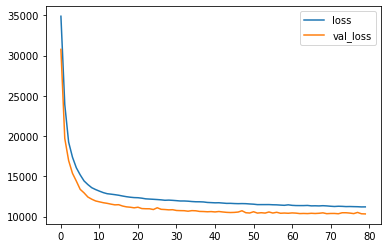

In [30]:
# ANN continued

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [35]:
y_test_pred = ANN.predict(X_test)

In [32]:
# y_test_pred

In [33]:
# y_test

In [36]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = metrics.mean_squared_error(y_test, y_test_pred, squared = False)
r_squared = metrics.r2_score(y_test, y_test_pred)
adjusted_r_squared=1-(((1-r_squared)*(4746-1))/(4746-23-1))

print('mae: ' +str(mae))
print('mse: ' +str(mse))
print('rmse: ' +str(rmse))
print('r_squared:' +str(r_squared))
print('adjusted_r_squared: ' +str(adjusted_r_squared))

# Results

# mae: 10328.163663137335
# mse: 695528017.3719858
# rmse: 26372.86517183876
# r_squared:0.7601507462329647
# adjusted_r_squared: 0.7589824843022909

mae: 10328.163663137335
mse: 695528017.3719858
rmse: 26372.86517183876
r_squared:0.7601507462329647
adjusted_r_squared: 0.7589824843022909


In [37]:
# The Deep Neural Network turned out to be the best model based on the metrics